<a href="https://colab.research.google.com/github/KamilShape/emotion_recognition/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**

In [1]:
#Libraries
import os
import cv2
from google.colab.patches import cv2_imshow
#----------------visualisation-------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_path = 'drive/MyDrive/faces/data'

In [3]:
people = ['smiling-person', 'anger-person', 'disgust-person', 'fear-person', 'surprise-person' ]

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
photos_number = []
for person in people:
  photos_number.append(len(os.listdir(f'{data_path}/{person}')))

In [6]:
photos_number

[1200, 1169, 1190, 1173, 1198]

### 1.1 Data visualisation

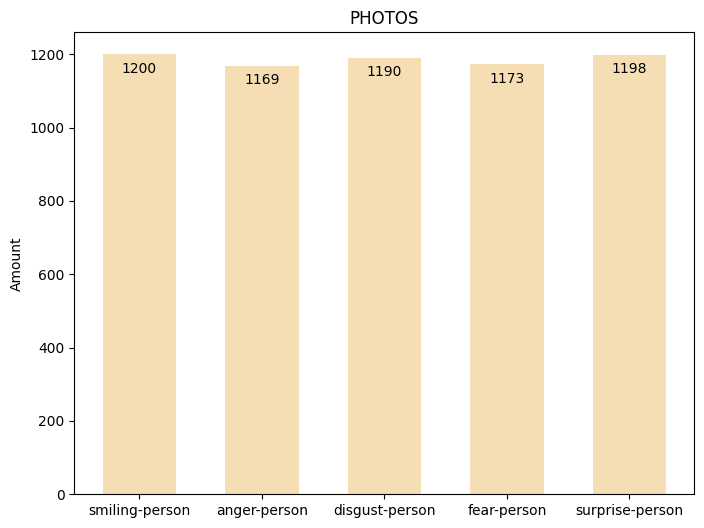

In [7]:
fig, ax = plt.subplots(figsize = (8,6))
ax.bar(people, photos_number, color='wheat', width=0.6)
ax.set_title('PHOTOS')
ax.set_ylabel('Amount')

for i in range(0, len(people)):
  ax.text(people[i], photos_number[i] - 50, horizontalalignment='center', s=photos_number[i] )

*Dataset is quite balanced.*

# **2. Face detection**

In [26]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
def face_recognition(photo, array):
  image = cv2.imread(photo)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  face = face_classifier.detectMultiScale(gray_image, 1.3, 4)
  if len(face) > 0:
   for i, (x, y, w, h) in enumerate(face):
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 2)
      face = image[y:y + h, x:x + w]
      array.append(face)

In [27]:
smiling_faces = []
anger_faces = []
disgust_faces = []
fear_faces = []
surprise_faces = []
def faces_array(array, photos):
  files_folder = os.listdir(f'{data_path}/{photos}')
  print(files_folder)
  for i in range(0, len(files_folder)):
    img_path = f'{data_path}/{photos}/{files_folder[i]}'
    face_recognition(img_path, array)

In [28]:
# ['smiling-person', 'anger-person', 'disgust-person', 'fear-person', 'surprise-person' ]
faces_array(smiling_faces, "smiling-person")
faces_array(anger_faces, "anger-person")
faces_array(disgust_faces, "disgust-person")
faces_array(fear_faces, "fear-person")
faces_array(surprise_faces, "surprise-person")

drive/MyDrive/faces/data/smiling-person
['u%C5%9Bmiechni%C4%99ta-m%C5%82oda-kobieta-w-dzielnicy-%C5%9Br%C3%B3dmiejskiej.jpg?s=612x612&w=0&k=20&c=JAdIUnHB89Rj4eI0URTBeGyQoaBNo9FohCIvSZnWgLk=', 'hipster-cz%C5%82owiek-w-szarym-t-shirt-studio-strza%C5%82-odosobniony.jpg?s=612x612&w=0&k=20&c=7Id05nauT2HA21OVDC4zWJL8BvKnoi0Up4UPgzTkw8s=', 'szcz%C4%99%C5%9Bliwa-roze%C5%9Bmiana-studentka-za-pomoc%C4%85-smartfona.jpg?s=612x612&w=0&k=20&c=GUhg_rhRHepe5zV-LZ7nBVj70y-by4CLID_vFdbaabc=', 'u%C5%9Bmiechni%C4%99ta-pracownica-siedzi-w-przestrzeni-coworkingowej-i-pracuje-nad-projektem.jpg?s=612x612&w=0&k=20&c=6bSx-MScIiFa4lA5_d2Re5lJ8ZglyVjTGWc4MnO5BEQ=', 'budowanie-relacji-zaufania-ze-swoimi-klientami.jpg?s=612x612&w=0&k=20&c=c7kRajPt1J6cs7uQZuelciOGurVN3yF8e8pXuHqs2og=', 'weso%C5%82a-m%C5%82oda-kobieta-robi%C4%85ca-sobie-selfie-nad-morzem.jpg?s=612x612&w=0&k=20&c=-7GAZaahbGKjqx7kkNqahHIBJ8pWWxP8lILCNyEBPgE=', 'zrelaksowana-kobieta-oddychaj%C4%85ca-%C5%9Bwie%C5%BCym-powietrzem-w-zielonym-lesie.jpg?s=61

In [31]:
anger_faces

[array([[[  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255],
         ...,
         [  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255],
         ...,
         [  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [255, 255, 255],
         ...,
         [ 85,  95, 112],
         [ 88,  98, 116],
         [  0, 255, 255]],
 
        ...,
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [ 52,  54,  55],
         ...,
         [ 64,  64,  64],
         [ 67,  67,  67],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [ 52,  54,  55],
         ...,
         [ 65,  65,  65],
         [ 67,  67,  67],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255],
         ...,
         [  0, 255, 255],
  

In [30]:
disgust_faces

[array([[[  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255],
         ...,
         [  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255],
         ...,
         [  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [186, 200, 218],
         ...,
         [ 47,  72,  88],
         [ 46,  71,  87],
         [  0, 255, 255]],
 
        ...,
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [232, 232, 232],
         ...,
         [ 65,  77,  87],
         [ 59,  74,  83],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [232, 232, 232],
         ...,
         [ 71,  87, 100],
         [ 65,  81,  93],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255],
         ...,
         [  0, 255, 255],
  

In [29]:
smiling_faces

[array([[[  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255],
         ...,
         [  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255],
         ...,
         [  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [ 66,  72,  91],
         ...,
         [ 46,  47,  57],
         [ 46,  47,  57],
         [  0, 255, 255]],
 
        ...,
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [  6,   8,   9],
         ...,
         [ 11,  13,  14],
         [  9,  11,  12],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [  6,   8,   9],
         ...,
         [  9,  11,  12],
         [  8,  10,  11],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255],
         ...,
         [  0, 255, 255],
  